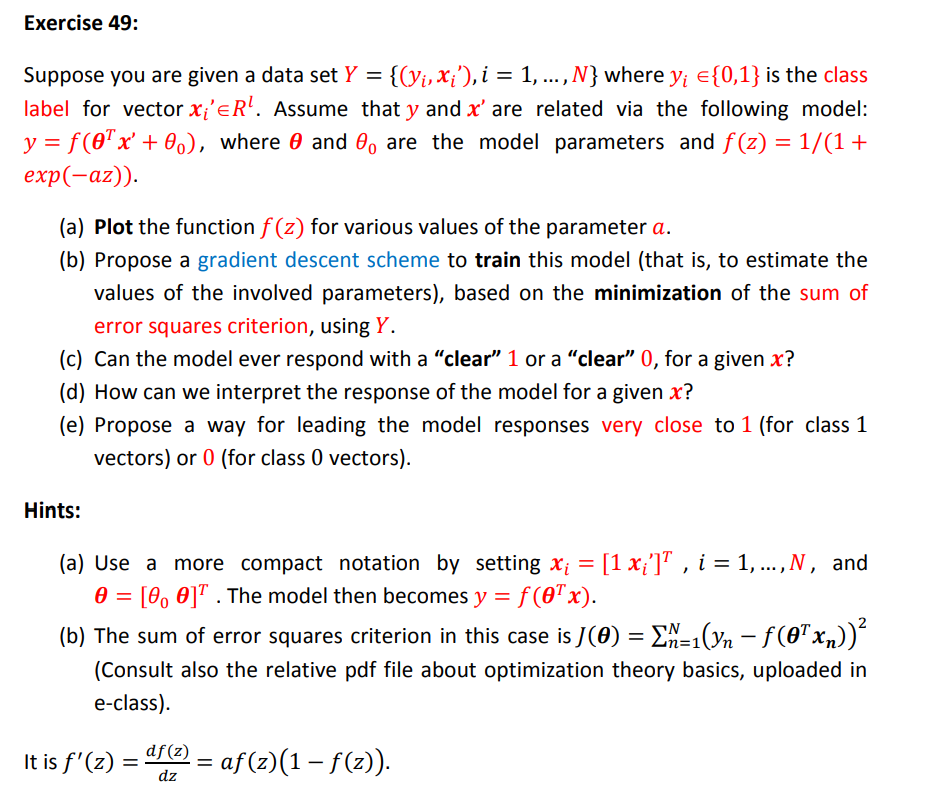

### (a) Plot the function \( f(z) \) for various values of the parameter \( a \)


C:\Users\steli\AppData\Local\Temp\ipykernel_7808\2985167747.py:22: RuntimeWarning: overflow encountered in exp
  f_z = 1 / (1 + np.exp(-a * z))


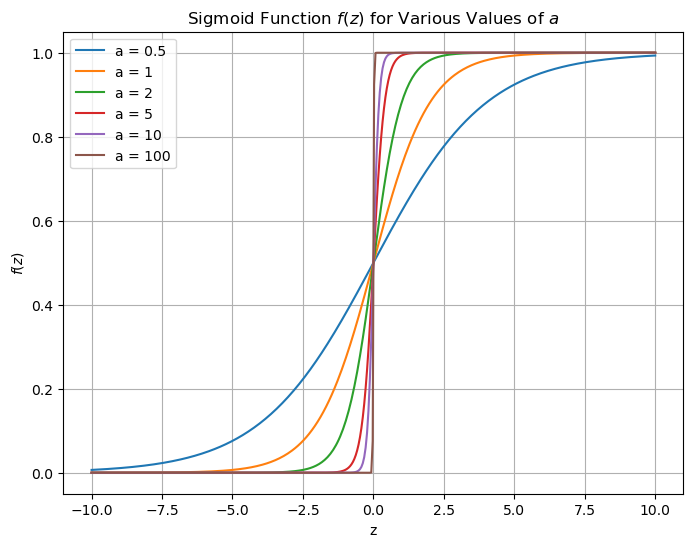

In [9]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y = Dataset['train_y']

test_x = Dataset['test_x']
test_y = Dataset['test_y']

# Values for z from -10 to 10
z = np.linspace(-10, 10, 400)

# Different values for a
a_values = [0.5, 1, 2, 5,10,100]

# Plot f(z) for different values of a
plt.figure(figsize=(8, 6))
for a in a_values:
    f_z = 1 / (1 + np.exp(-a * z))
    plt.plot(z, f_z, label=f'a = {a}')

plt.title('Sigmoid Function $f(z)$ for Various Values of $a$')
plt.xlabel('z')
plt.ylabel('$f(z)$')
plt.legend()
plt.grid(True)
plt.show()


### (b) Propose a gradient descent scheme to train this model


### (b) Gradient Descent Scheme for Estimating Parameters

To estimate the parameters $\theta$, we aim to minimize the cost function $J(\theta)$. The gradient descent update rule to achieve this is as follows:

$$
\theta_i = \theta_{i-1} - \mu \nabla_\theta J(\theta) \quad \text{(16)}
$$

where the cost function $J(\theta)$ is defined by the sum of squared errors:

$$
J(\theta) = \sum_{n=1}^{N} \left( y_n - f(\theta^T x_n) \right)^2
$$

In this formulation, we have incorporated the bias term $\theta_0$ into the parameter vector $\theta$ by augmenting the feature vector $x_n$ to include a 1 as its first component. This allows us to treat $\theta_0$ as part of $\theta$.

The gradient of the cost function, $\nabla_\theta J(\theta)$, with respect to the parameter vector is given by:

$$
\nabla_\theta J(\theta) = -2 \sum_{n=1}^{N} \left( y_n - f(\theta^T x_n) \right) \left( a f(\theta^T x_n) (1 - f(\theta^T x_n)) \right) x_n \quad \text{(17)}
$$

Where $f(z) = \frac{1}{1 + \exp(-z)}$ is the sigmoid function, and $a$ is a scaling factor. The term $f(\theta^T x_n) (1 - f(\theta^T x_n))$ corresponds to the derivative of the sigmoid function.

Using this gradient, we update the parameters $\theta$ at each iteration of the gradient descent process:

$$
\theta_i = \theta_{i-1} + 2 \mu \sum_{n=1}^{N} \left( y_n - f(\theta^T x_n) \right) \left( a f(\theta^T x_n) (1 - f(\theta^T x_n)) \right) x_n \quad \text{(18)}
$$

Where:
- $\mu$ represents the learning rate, controlling the size of each update.
- $\theta_i$ is the parameter vector at iteration $i$, and $\theta_{i-1}$ is the parameter vector at the previous iteration.
- $x_n$ is the augmented feature vector of the $n$-th sample.

Through this iterative process, the parameters $\theta$ are updated in a way that minimizes the cost function $J(\theta)$, gradually improving the model's predictions as the iterations progress.


### (c) Can the model ever respond with a “clear” 1 or a “clear” 0, for a given \( \mathbf{x} \)?


No, the logistic regression model (sigmoid function) cannot give an absolute 1 or 0. It outputs a probability between 0 and 1. The closer the value is to 1 or 0, the more confident the model is in its prediction, but it will never give a "hard" 1 or 0 unless we apply a threshold, such as 0.5, to make a decision.


### (d) How can we interpret the response of the model for a given \( \mathbf{x} \)?


The response of the model can be interpreted as the probability that the input vector $ \mathbf{x} $ belongs to class 1. For example, if $ f(z) = 0.8 $, it means the model predicts an 80% probability that the sample belongs to class 1, and 20% probability for class 0.


### (e) Propose a way for leading the model responses very close to 1 (for class 1 vectors) or 0 (for class 0 vectors)


To make the model's responses closer to 1 or 0 for class 1 or class 0 vectors, we can:
1. **Regularization**: Apply a regularization term (e.g., L2 regularization) to penalize large parameter values and encourage sharper predictions.
2. **Increase the steepness of the sigmoid function**: By increasing the value of \( a \) in the sigmoid function, the model will become more confident in its predictions. However, this can also make the model less generalizable. This is also observed in question (a).
3. **Thresholding**: After training, apply a thresholding mechanism to convert the probabilities into clear class labels. For example, classify anything above 0.9 as class 1, and anything below 0.1 as class 0.


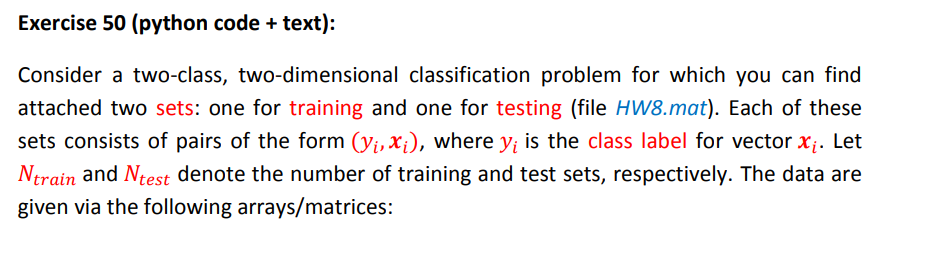
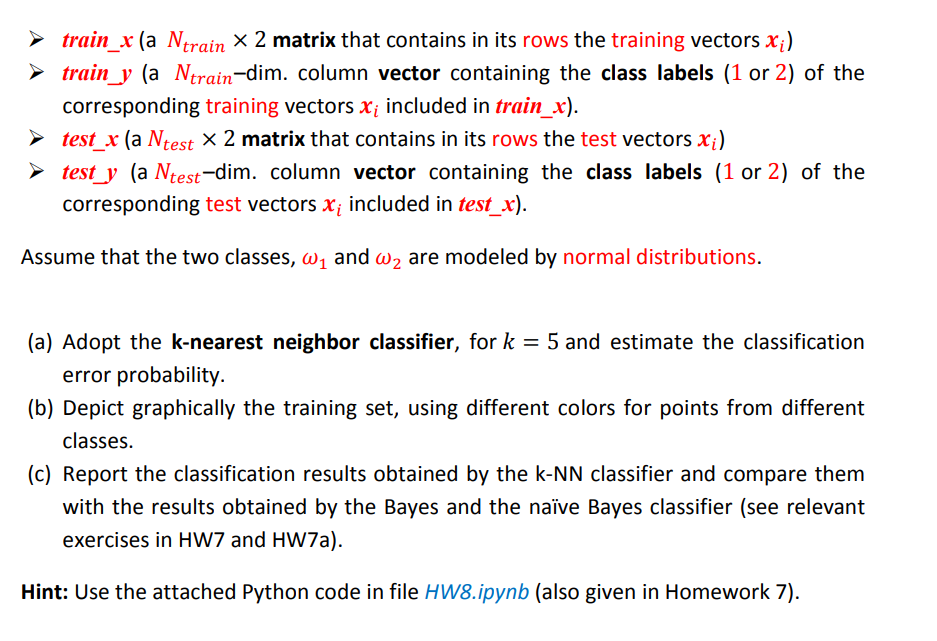

#### (a) Adopt the k-nearest neighbor classifier, for $k = 5$ and estimate the classification error probability.


In [35]:
import scipy.io as sio
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset from HW8.mat
Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y = Dataset['train_y'].flatten()  # Convert to 1D array if it's not already
test_x = Dataset['test_x']
test_y = Dataset['test_y'].flatten()  # Convert to 1D array if it's not already

# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier on the training data
knn.fit(train_x, train_y)

# Predict on the test set
predictions = knn.predict(test_x)

# Calculate the classification error
error = 1 - accuracy_score(test_y, predictions)

print(f"Classification Error Probability: {error:.4f}")


Classification Error Probability: 0.1700


#### (b) Depict graphically the training set, using different colors for points from different classes.


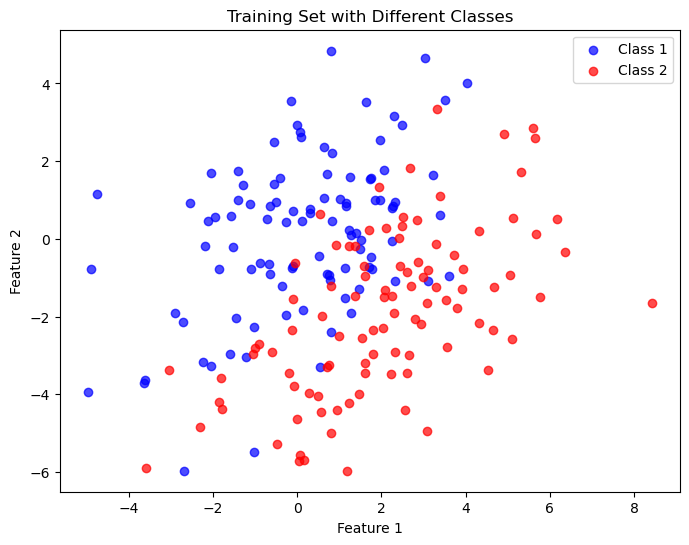

In [39]:
import matplotlib.pyplot as plt

# Plot the training data
plt.figure(figsize=(8, 6))

# Class 1 points (train_y == 1)
class_1 = train_x[train_y == 1]
# Class 2 points (train_y == 2)
class_2 = train_x[train_y == 2]

# Scatter plot for class 1 and class 2
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class 2', alpha=0.7)

# Adding labels and title
plt.title('Training Set with Different Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()


### (c) Report the classification results obtained by the k-NN classifier and compare them with the results obtained by the Bayes and the naïve Bayes classifier (see relevant exercises in HW7 and HW7a).

The classification error rates for each classifier on the test set are as follows:

#### k-NN Classifier:
- **Error Rate**: 0.1700

#### Bayes Classifier:
- **Error Rate**: 0.150

#### Naïve Bayes Classifier:
- **Error Rate**: 0.165

#### Comparison:
- The **Bayes classifier** outperforms both the **Naïve Bayes classifier** and the **k-NN classifier** by achieving the lowest error rate (0.150).
- The **Naïve Bayes classifier** performs slightly worse than the **Bayes classifier** due to its assumption of feature independence, resulting in a higher error rate of 0.165.
- The **k-NN classifier** has an error rate of 0.1700, which is slightly worse than both the **Naïve Bayes** and **Bayes classifiers**, showing that while **k-NN** is a strong classifier, it does not perform as well as the probabilistic models on this dataset.
